# Outlet Sales Prediction(MLR)

### Apoorva Kalaskar 
### Batch: DP-2008-OM

In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing data from csv file

data = pd.read_csv("MART_data.csv")

In [3]:
# Checking data

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Dataset Description:

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Understanding the dataset

In [4]:
# Shape of data

data.shape

(4816, 12)

In [5]:
# Attributes in dataset 

data.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
# Checking for any duplicate records

data.duplicated().sum()

0

We understand from above information that the dataset has 4816 records accross 12 attributes. There are no duplicate records in the dataset. 

## Exploratory Data Analysis 

### Univariate Analysis

In [7]:
# Knowing the total variables and their types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4816 non-null   object 
 1   Item_Weight                4022 non-null   float64
 2   Item_Fat_Content           4816 non-null   object 
 3   Item_Visibility            4816 non-null   float64
 4   Item_Type                  4816 non-null   object 
 5   Item_MRP                   4816 non-null   float64
 6   Outlet_Identifier          4816 non-null   object 
 7   Outlet_Establishment_Year  4816 non-null   int64  
 8   Outlet_Size                3426 non-null   object 
 9   Outlet_Location_Type       4816 non-null   object 
 10  Outlet_Type                4816 non-null   object 
 11  Item_Outlet_Sales          4816 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 451.6+ KB


The attributes belonging to 'object' datatype are of string type and 'float64' are of numeric datatypes. 

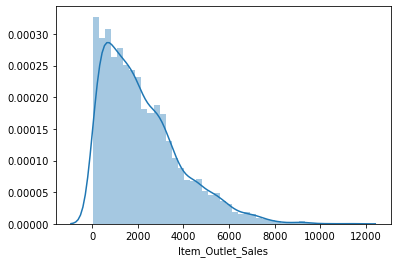

In [8]:
# Checking on Target Variable: Item_Outlet_Sales

sns.distplot(data['Item_Outlet_Sales'])

The sales variable is positively skewed. 

In [9]:
# Checking statistical measures for dataset

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4022.000000,4816.000000,4816.000000,4816.000000,4816.000000
mean,12.980692,0.065810,141.071687,1997.874377,2182.661476
std,4.654852,0.051283,62.470580,8.306349,1696.372682
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.895000,0.026892,93.611350,1987.000000,843.568600
50%,12.850000,0.054333,143.012800,1999.000000,1801.987500
75%,17.100000,0.094252,186.592400,2004.000000,3089.478500
max,21.350000,0.328391,266.888400,2009.000000,11445.100000


In [10]:
# Identifying unique values for each atribute

for i in data.keys():
    print(i)
    print()
    print('The values are:') 
    print(data[i].value_counts())
    print()
    print()

Item_Identifier

The values are:
FDU23    8
FDR43    8
FDJ55    8
FDF16    7
FDW24    7
        ..
FDW58    1
NCF30    1
DRF48    1
DRF51    1
FDG28    1
Name: Item_Identifier, Length: 1530, dtype: int64


Item_Weight

The values are:
12.150    55
17.600    50
11.800    47
13.650    45
16.000    40
          ..
8.680      1
8.655      1
5.675      1
5.305      1
5.845      1
Name: Item_Weight, Length: 402, dtype: int64


Item_Fat_Content

The values are:
Low Fat    2899
Regular    1614
LF          176
reg          67
low fat      60
Name: Item_Fat_Content, dtype: int64


Item_Visibility

The values are:
0.000000    294
0.080969      2
0.041974      2
0.106968      2
0.076975      2
           ... 
0.038606      1
0.133198      1
0.148258      1
0.065042      1
0.052339      1
Name: Item_Visibility, Length: 4430, dtype: int64


Item_Type

The values are:
Fruits and Vegetables    708
Snack Foods              674
Household                511
Frozen Foods             497
Dairy             

Categorical Variables: Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type
Continous Variables: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

As year of establishment will not be appropriate to infer any information so we can convert it to years of outlet by subtracting current year from the values.

Outlet_Establishment_Year column is int type so converting it to datetime. Using datetime we are extracting current year and then adding an additional column Year_Outlet that specifies years of the shop is opened. 

Item_Visibility : Around 294 items have visibility as 0, which is a bit unusval behaviour. So we will treat '0' as missing values in item visibility. 

Item_Fat_Content: The values have some duplicate labels like: 'Low Fat' and 'low fat' means same. Also 'Regular' and 'reg' means same.

In [11]:
from datetime import date
today= date.today()
year= today.year

data["Outlet_Establishmet_Year"] = pd.to_datetime(data.Outlet_Establishment_Year, format="%Y").dt.year
data["Years_Outlet"] = year - data["Outlet_Establishmet_Year"]

In [12]:
# Checking dataset

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishmet_Year,Years_Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1999,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2009,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1999,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1998,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1987,34


Dropping Outlet_Establishment_Year column as it is not required anymore. 

In [13]:
data.drop(["Outlet_Establishment_Year"], axis = 1, inplace = True)

In [14]:
# Checking dataset

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishmet_Year,Years_Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,1999,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,2009,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,1999,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,1998,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,1987,34


### Imputing Missing Values

In [15]:
# Checking for missing values

data.isnull().sum()

Item_Identifier                0
Item_Weight                  794
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Size                 1390
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Outlet_Establishmet_Year       0
Years_Outlet                   0
dtype: int64

There are 2 attributes: Item_Weight and Outlet_Size having missing values in dataset. 
Outlet_Size is a categorical variable and Item_Weight is a continous variable. We need to impute values for these missing values. 
Also we need to impute values for item with visibility '0'. 
We need to have correct values assigned for fat content column. 

In [16]:
# We are checking relation between Outlet_Size and Outlet_Type.

crosstable = pd.crosstab(data['Outlet_Size'],data['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,541,0,0
Medium,0,516,501,520
Small,274,1074,0,0


As all Grocery Store belongs to Outlet_Size 'Small', hence we will map all the missing Outlet_Size of Grocery store as 'Small'. 

In [17]:
dict1 = {'Grocery Store':'Small'}
s = data.Outlet_Type.map(dict1)
data.Outlet_Size= data.Outlet_Size.combine_first(s)
data.Outlet_Size.value_counts()

Small     1662
Medium    1537
High       541
Name: Outlet_Size, dtype: int64

In [18]:
# Checking for any missing values

data.isnull().sum()

Item_Identifier                0
Item_Weight                  794
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Size                 1076
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Outlet_Establishmet_Year       0
Years_Outlet                   0
dtype: int64

We still have missing values in Outlet_Size so finding other relations. 

In [19]:
# We are checking relation of Outlet_Size with Outlet_Type.

crosstable = pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,541
Medium,516,0,1021
Small,810,538,314


As all 'Tier 2' location tye belongs to 'Small' Outlet_Size hence substituing missing values for outlet size of 'Tier 2' location with 'Small'.

In [20]:
dict2 = {'Tier 2':'Small'}
s1 = data.Outlet_Location_Type.map(dict2)
data.Outlet_Size= data.Outlet_Size.combine_first(s1)

In [21]:
# Checking for any missing values

data.isnull().sum()

Item_Identifier               0
Item_Weight                 794
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
Outlet_Establishmet_Year      0
Years_Outlet                  0
dtype: int64

We have successfully imputed values for Outlet_Size by statistical measure Mode.

In [22]:
# Imputing values for Item_Weight by mean weight of the item(mean and median are almost same)

data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [23]:
# Checking if all null values are imputed

data.isnull().sum()

Item_Identifier              0
Item_Weight                 37
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Establishmet_Year     0
Years_Outlet                 0
dtype: int64

After imputing values for Item_Weight with mean we are still having some entries which are null because in the dataset there is only one record for each of them. Hence mean could not be calculated. Looking for those entries. 

In [24]:
# Displaying missing values from Item_Weight

data[data.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishmet_Year,Years_Outlet
186,FDO08,NaN,Regular,0.094154,Fruits and Vegetables,165.7526,OUT019,Small,Tier 1,Grocery Store,657.8104,1985,36
255,FDQ04,NaN,Low Fat,0.148393,Frozen Foods,41.5796,OUT019,Small,Tier 1,Grocery Store,41.2796,1985,36
300,FDV13,NaN,Regular,0.027477,Canned,87.9856,OUT027,Medium,Tier 3,Supermarket Type3,3251.7670,1985,36
319,FDY31,NaN,Low Fat,0.043352,Fruits and Vegetables,146.6418,OUT027,Medium,Tier 3,Supermarket Type3,4414.2540,1985,36
404,FDU45,NaN,Regular,0.035334,Snack Foods,115.3518,OUT027,Medium,Tier 3,Supermarket Type3,2277.0360,1985,36
446,FDS09,NaN,Regular,0.141975,Snack Foods,49.6008,OUT019,Small,Tier 1,Grocery Store,50.6008,1985,36
739,FDE38,NaN,Low Fat,0.044391,Canned,164.3842,OUT027,Medium,Tier 3,Supermarket Type3,4476.1730,1985,36
837,NCM19,NaN,Low Fat,0.047008,Others,112.0202,OUT027,Medium,Tier 3,Supermarket Type3,5063.4090,1985,36
920,FDO49,NaN,Regular,0.057870,Breakfast,49.7008,OUT019,Small,Tier 1,Grocery Store,50.6008,1985,36
924,FDQ24,NaN,Low Fat,0.128981,Baking Goods,250.4724,OUT019,Small,Tier 1,Grocery Store,251.6724,1985,36


Hence now we will be imputing remaining values with mean weight of Item_Type. 

In [25]:
# List of item types 
item_type_list = data.Item_Type.unique().tolist()

# Grouping based on item type and calculating mean of item weight
Item_Type_Means = data.groupby('Item_Type')['Item_Weight'].mean()

# Mapiing Item weight to item type mean
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = data.Item_Type.map(dic)
    data.Item_Weight = data.Item_Weight.combine_first(s)
    
Item_Type_Means = data.groupby('Item_Type')['Item_Weight'].mean() 

In [26]:
# Checking for missing values in dataset

data.isnull().sum()

Item_Identifier             0
Item_Weight                 0
Item_Fat_Content            0
Item_Visibility             0
Item_Type                   0
Item_MRP                    0
Outlet_Identifier           0
Outlet_Size                 0
Outlet_Location_Type        0
Outlet_Type                 0
Item_Outlet_Sales           0
Outlet_Establishmet_Year    0
Years_Outlet                0
dtype: int64

Now we have no missing values in our dataset.

In [27]:
# Checking unique values for Item_Fat_Content

data.Item_Fat_Content.value_counts()

Low Fat    2899
Regular    1614
LF          176
reg          67
low fat      60
Name: Item_Fat_Content, dtype: int64

We need to replace 'LF' and 'low fat' with 'Low Fat', also 'reg' with 'Regular'. 

In [28]:
data.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
data.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

In [29]:
data.Item_Fat_Content.value_counts()

Low Fat    3135
Regular    1681
Name: Item_Fat_Content, dtype: int64

In [30]:
# Imputing '0' in Item_Visibility column 

# Replacing 0's with NaN

data.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

# Now fill by mean of visbility based on item identifiers

data.Item_Visibility = data.Item_Visibility.fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [31]:
# Checking if Imputation was carried out successfully

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility             11
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Establishmet_Year     0
Years_Outlet                 0
dtype: int64

In [32]:
data.Item_Visibility.value_counts()

0.122069    4
0.105893    4
0.029475    3
0.016164    3
0.055383    3
           ..
0.065042    1
0.030981    1
0.086078    1
0.045526    1
0.121554    1
Name: Item_Visibility, Length: 4640, dtype: int64

As we still have around 11 rows with item_visibility as null we will be dropping those records from our dataset.

In [33]:
data = data.dropna()

In [34]:
data.shape

(4805, 13)

### Data Visualization

Checking the impact of each categorical variable on sales by using Box Plot as our target variable is continous. 

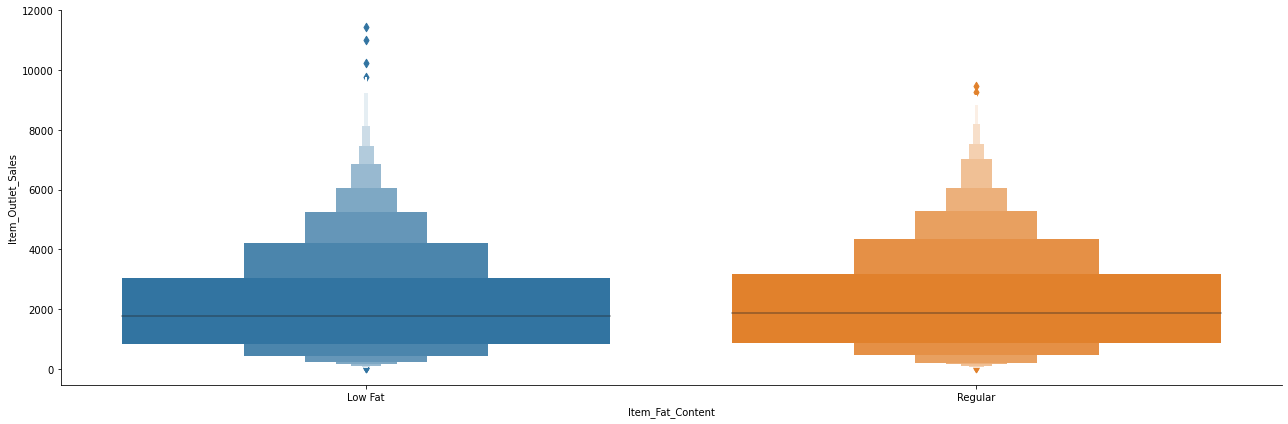

In [35]:
# Item_Fat_Content Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Item_Fat_Content", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Fat content has minimal impact on sales. There are few percent of people who consider fat content while buying the product. 

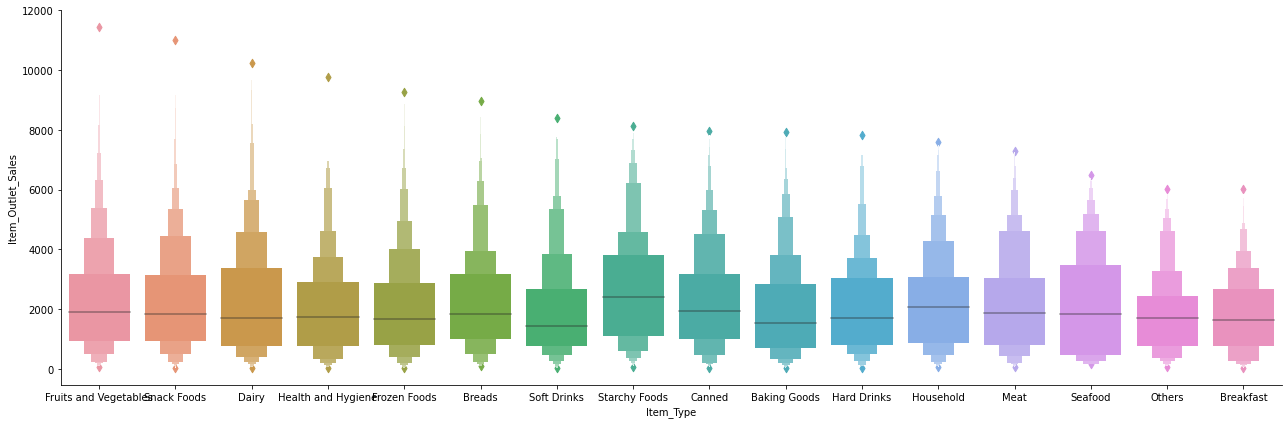

In [36]:
# Item_Type Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Item_Type", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

The audience have different choices for their needs while buying products. 

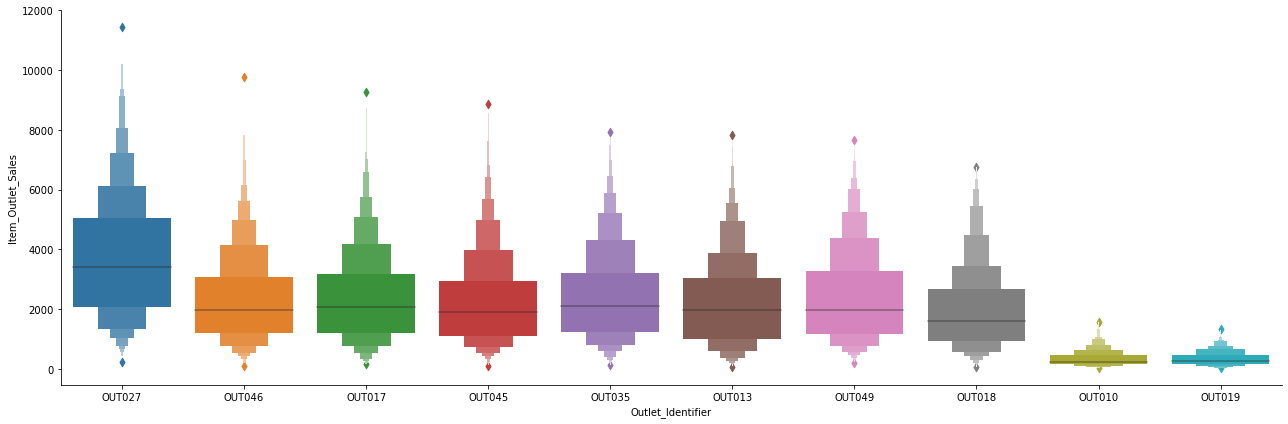

In [37]:
# Outlet_Identifier Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Identifier", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Outlets have impact on sales. There are outlets which have higher/lower sales than other outlets. 

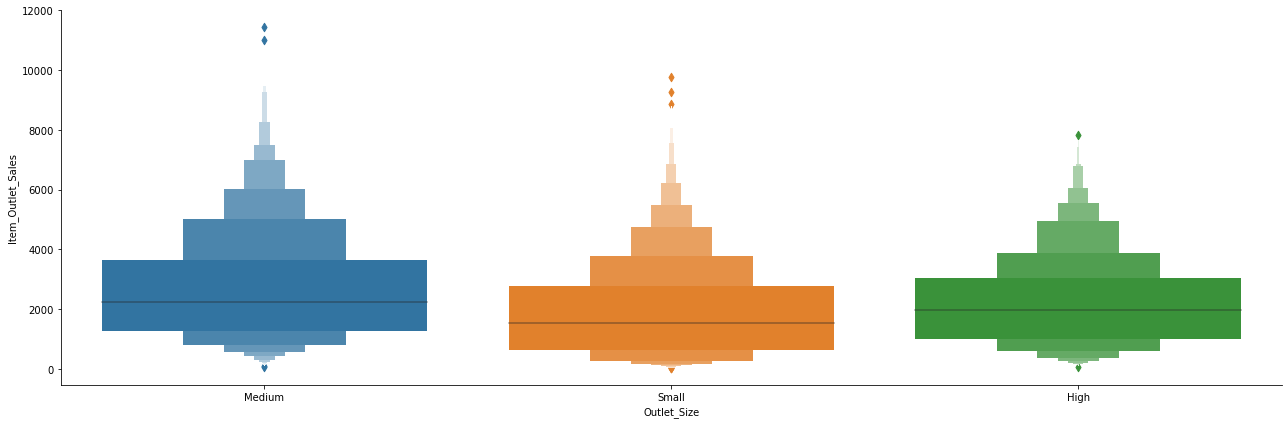

In [38]:
# Outlet_Size Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Size", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Outlet size impacts the item sales. 

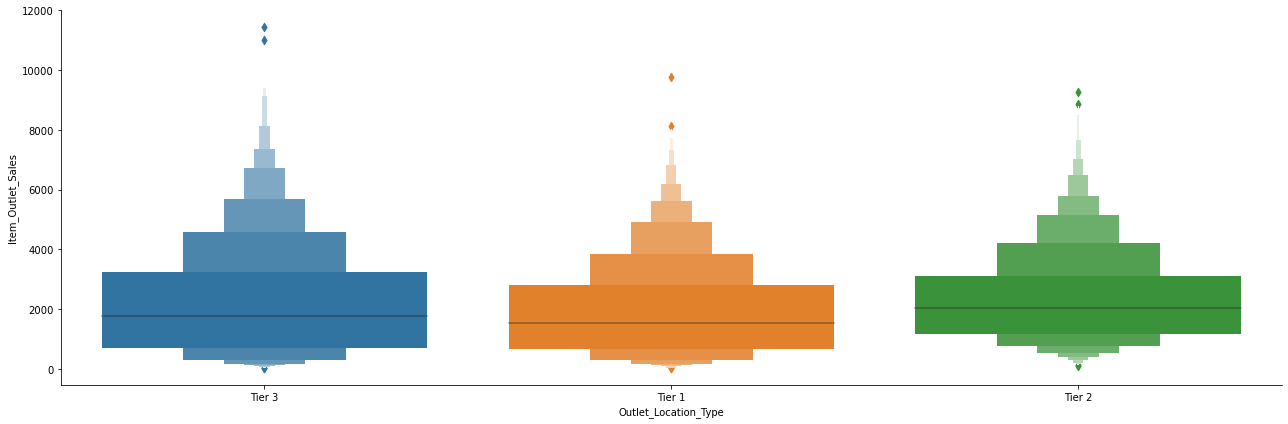

In [39]:
# Outlet_Location_Type Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Location_Type", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Outlet Location Type has a little impact on item sales. 

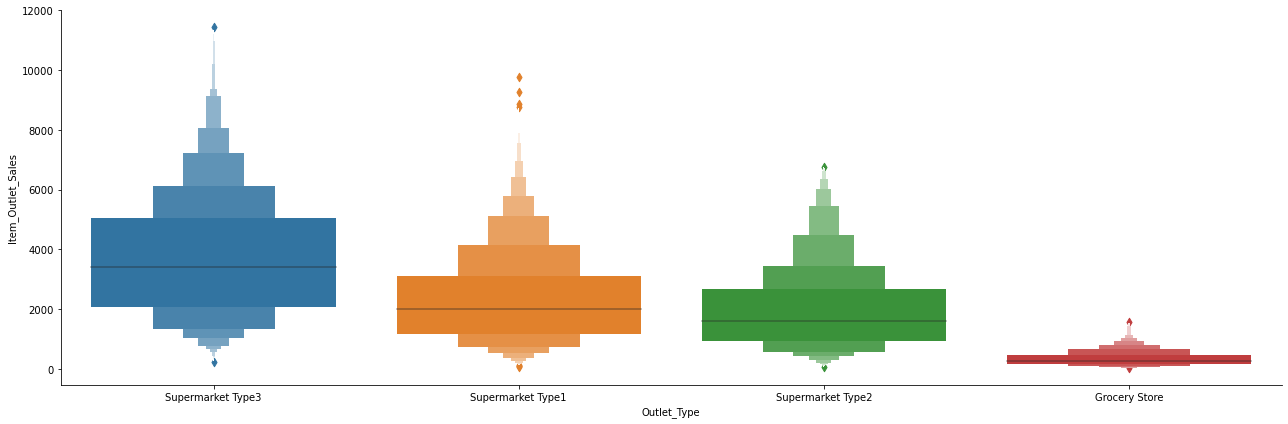

In [40]:
# Outlet_Type Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Type", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Outlet Type has huge impact on item sales. 

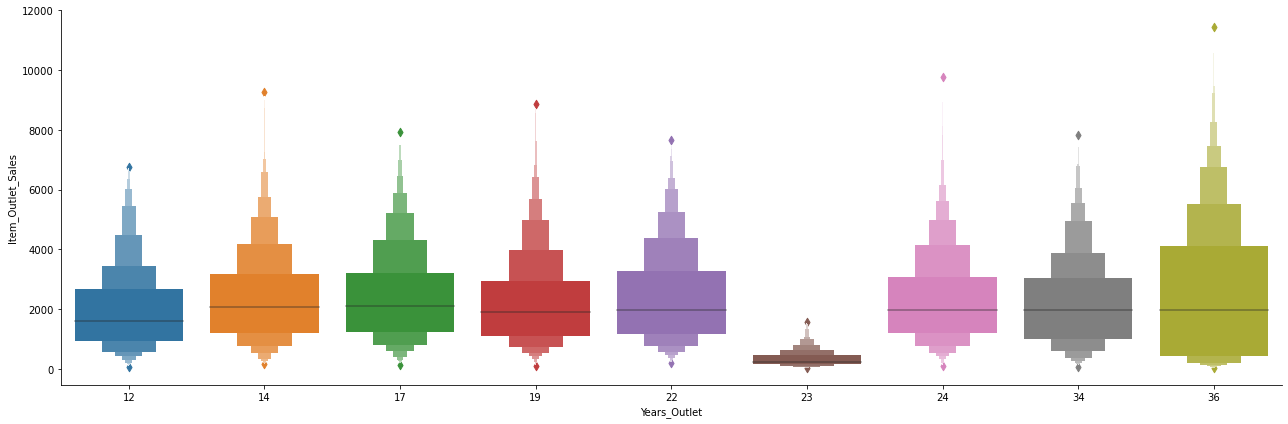

In [41]:
# Years_Outlet Vs Item_Outlet_Sales

sns.catplot(y = "Item_Outlet_Sales", x = "Years_Outlet", data = data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Years of the outlet has little more impact on outlet sales. 

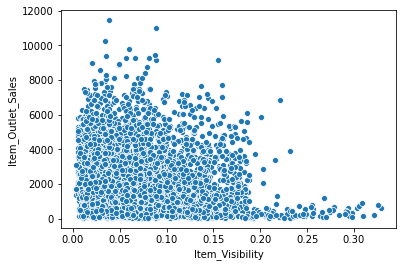

In [42]:
# Item_Visibility Vs Item_Outlet_Sales

sns.scatterplot(data=data, x="Item_Visibility", y="Item_Outlet_Sales")

We can observe that the item with visibility less than 0.20 have higher sales. 

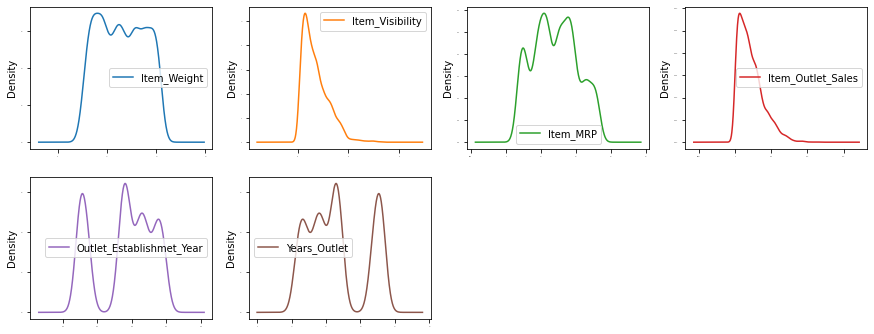

In [43]:
# Density plot of Numeric attributes 

data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

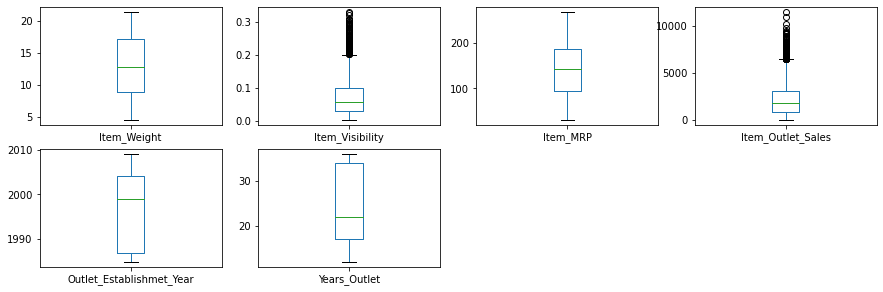

In [44]:
# Box Plot 

data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show()

### Handling Categorical Data 

One can find many ways to handle categorical data. Some of them categorical data are,
1. Nominal data: Data are not in any order -> OneHotEncoder
2. Ordinal data: Data are in order -> LabelEncoder

Outlet_Size and Outlet_Location_Type are Ordinal Data which needs Label Encoder. Whereas othr columns like Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Type are Nominal data attributes which need One Hot Encoding. 

In [45]:
# Outlet_Size Label Encoder

data["Outlet_Size"].value_counts()

Small     2732
Medium    1534
High       539
Name: Outlet_Size, dtype: int64

In [46]:
# Replacing values by numbers in certain order 

data.replace({"Small": 0, "Medium": 1, "High": 2}, inplace = True)

In [47]:
# Mapping the values to dataframe

data1 = data
data1 = pd.DataFrame(range(3),columns=['Outlet_Size'])
data.Outlet_Size = data.Outlet_Size.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [48]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishmet_Year,Years_Outlet
0,FDA15,9,Low Fat,0,Dairy,250,OUT049,1,Tier 1,Supermarket Type1,"3,735",1999,22
1,DRC01,6,Regular,0,Soft Drinks,48,OUT018,1,Tier 3,Supermarket Type2,443,2009,12
2,FDN15,18,Low Fat,0,Meat,142,OUT049,1,Tier 1,Supermarket Type1,"2,097",1999,22
3,FDX07,19,Regular,0,Fruits and Vegetables,182,OUT010,0,Tier 3,Grocery Store,732,1998,23
4,NCD19,9,Low Fat,0,Household,54,OUT013,2,Tier 3,Supermarket Type1,995,1987,34


In [49]:
# Outlet_Location_Type Label Encoder

data["Outlet_Location_Type"].value_counts()

Tier 3    1872
Tier 2    1610
Tier 1    1323
Name: Outlet_Location_Type, dtype: int64

In [50]:
# Replacing values by numbers in certain order

data.replace({"Tier 1": 2, "Tier 2": 1, "Tier 3": 0}, inplace = True)

# Mapping the values to dataframe

data2 = data
data2 = pd.DataFrame(range(3),columns=['Outlet_Location_Type'])
data.Outlet_Location_Type = data.Outlet_Location_Type.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [51]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishmet_Year,Years_Outlet
0,FDA15,9,Low Fat,0,Dairy,250,OUT049,1,2,Supermarket Type1,"3,735",1999,22
1,DRC01,6,Regular,0,Soft Drinks,48,OUT018,1,0,Supermarket Type2,443,2009,12
2,FDN15,18,Low Fat,0,Meat,142,OUT049,1,2,Supermarket Type1,"2,097",1999,22
3,FDX07,19,Regular,0,Fruits and Vegetables,182,OUT010,0,0,Grocery Store,732,1998,23
4,NCD19,9,Low Fat,0,Household,54,OUT013,2,0,Supermarket Type1,995,1987,34


In [52]:
# Dropping the Item_Identifier and Outlet_Establishmet_Year column

data.drop(["Item_Identifier"], axis = 1, inplace = True)
data.drop(["Outlet_Establishmet_Year"], axis = 1, inplace = True)

In [53]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Outlet
0,9,Low Fat,0,Dairy,250,OUT049,1,2,Supermarket Type1,"3,735",22
1,6,Regular,0,Soft Drinks,48,OUT018,1,0,Supermarket Type2,443,12
2,18,Low Fat,0,Meat,142,OUT049,1,2,Supermarket Type1,"2,097",22
3,19,Regular,0,Fruits and Vegetables,182,OUT010,0,0,Grocery Store,732,23
4,9,Low Fat,0,Household,54,OUT013,2,0,Supermarket Type1,995,34


In [54]:
# One Hot Encoding on the dataset

data = pd.get_dummies(data, drop_first=True )

In [55]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_Outlet,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,250,1,2,"3,735",22,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,6,0,48,1,0,443,12,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,18,0,142,1,2,"2,097",22,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,19,0,182,0,0,732,23,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,54,2,0,995,34,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We have successfully completed One Hot Encoding for our dataset. 

### Bivariate Analysis

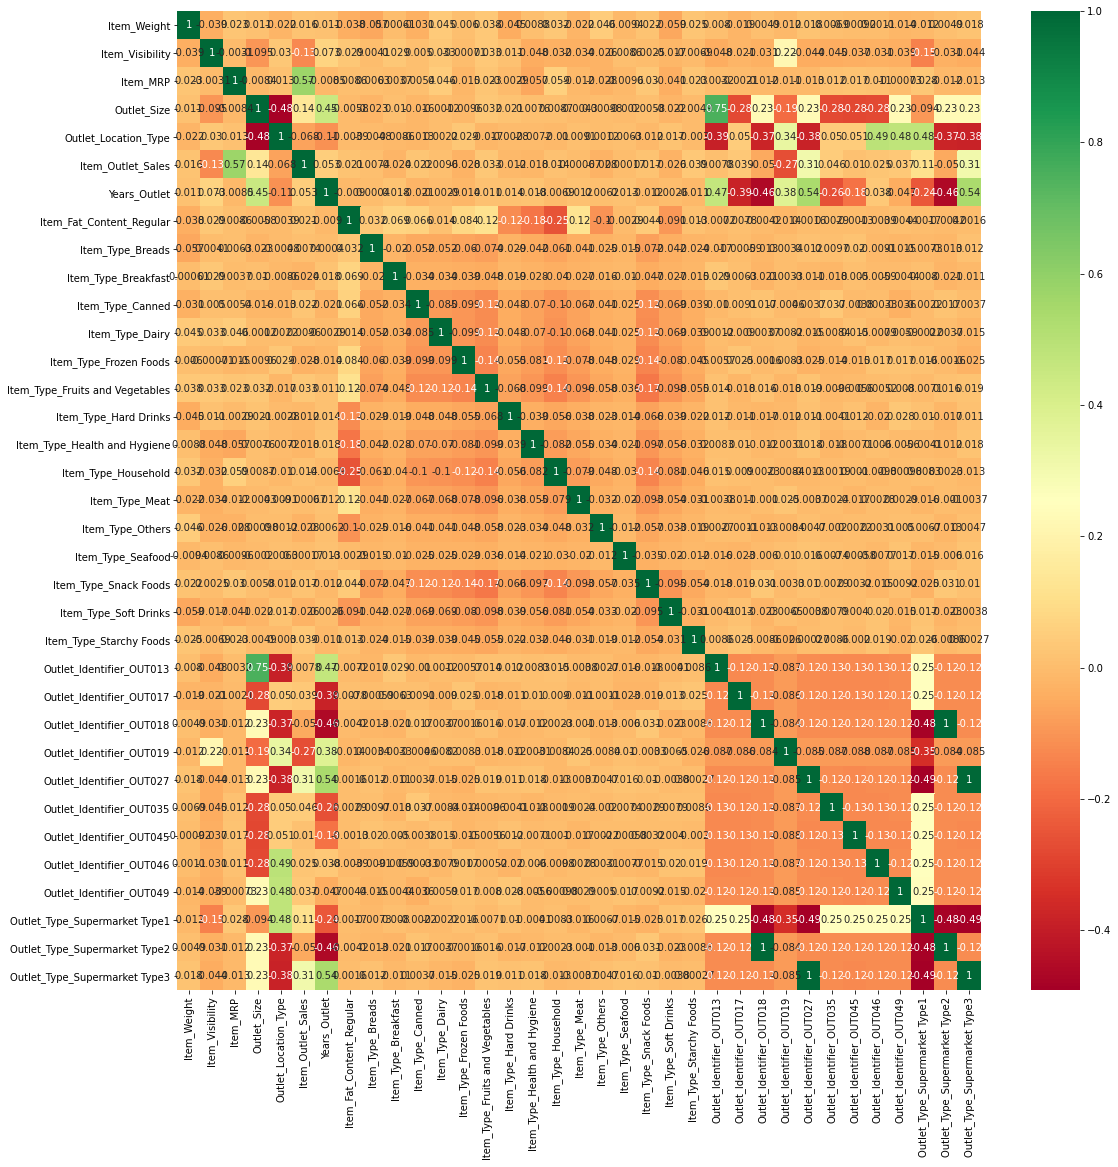

In [56]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

We can see from above that Outlet_Type_Supermarket Type2 is highly correlated with Outlet_Identifier_OUT018 and Outlet_Type_Supermarket Type3 is highly correlated with Outlet_Identifier_OUT027. Hence we can delete 1 column from each pair. 

In [57]:
#data1.drop(["Outlet_Type_Supermarket Type2"], axis = 1, inplace = True)
#data1.drop(["Outlet_Type_Supermarket Type3"], axis = 1, inplace = True)

### Feature Selection

In [58]:
data.keys()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Years_Outlet',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [59]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_Outlet,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,250,1,2,"3,735",22,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,6,0,48,1,0,443,12,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,18,0,142,1,2,"2,097",22,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,19,0,182,0,0,732,23,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,54,2,0,995,34,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
y = data[['Item_Outlet_Sales']]
y.head()

,Item_Outlet_Sales
0,"3,735"
1,443
2,"2,097"
3,732
4,995


In [61]:
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Years_Outlet',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Years_Outlet,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,250,1,2,22,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,6,0,48,1,0,12,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,18,0,142,1,2,22,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,19,0,182,0,0,23,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,54,2,0,34,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

<ipython-input-62-b5cac6a798fb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesRegressor()

In [63]:
print(selection.feature_importances_)

[6.28429710e-02 6.29975029e-02 4.12131390e-01 1.80323611e-02
 6.50008844e-03 1.56651988e-02 1.94864211e-02 6.32488526e-03
 2.83484545e-03 8.93278971e-03 1.11592952e-02 1.04241084e-02
 1.46802407e-02 5.26087400e-03 6.96122741e-03 1.06467204e-02
 7.22861075e-03 2.75049168e-03 2.16295248e-03 1.35876570e-02
 8.17847485e-03 5.48087618e-03 3.71974263e-03 7.69937439e-03
 1.84966315e-02 5.25883132e-05 6.33592984e-02 9.90122786e-03
 9.24724670e-03 8.24903846e-03 6.03763882e-03 9.61778375e-02
 1.87178288e-02 4.40715637e-02]


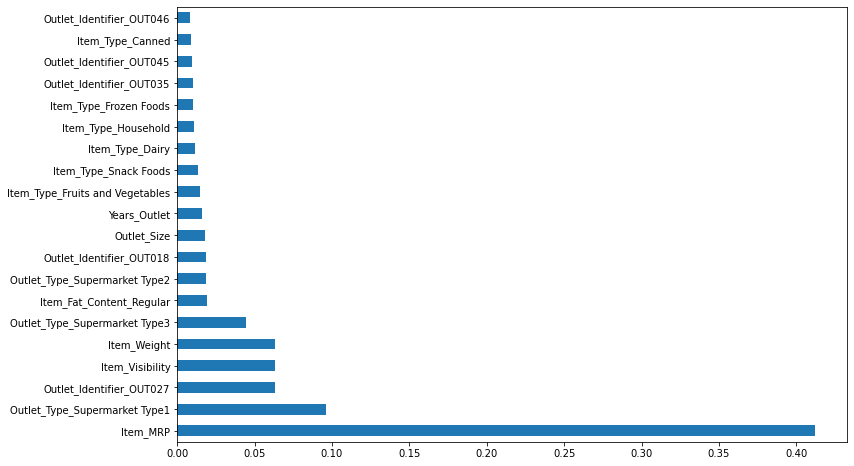

In [64]:
# Mapping the values of feature_importance to represent in bar graph. 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

We can clearly see how each features impact the sales of the item. 

## Spliting the dataset in training and testing set

In [65]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
train, test = train_test_split(data, test_size = test_size, random_state = seed)

In [66]:
train.shape , test.shape , data.shape

((3603, 35), (1202, 35), (4805, 35))

In [67]:
train_X = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
        'Years_Outlet', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]

test_X = test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
        'Years_Outlet', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]


train_y = train[['Item_Outlet_Sales']]

test_y = test[['Item_Outlet_Sales']]

## Model Fit on entire dataset

In [1]:
#Model training
model = LinearRegression()
result = model.fit(train_X, train_y)

NameError: name 'LinearRegression' is not defined

In [69]:
train_MSE = np.mean((train_y - result.predict(train_X))**2)
print("RMSE =",np.sqrt(train_MSE))

RMSE = Item_Outlet_Sales   1,132
dtype: float64


In [70]:
print("R2 value =",result.score(train_X, train_y))

R2 value = 0.569154394464102


#### Making Predictions over testing dataset

In [71]:
y_pred = model.predict(test_X)

In [72]:
model.score(test_X, test_y)

0.5463750124449178

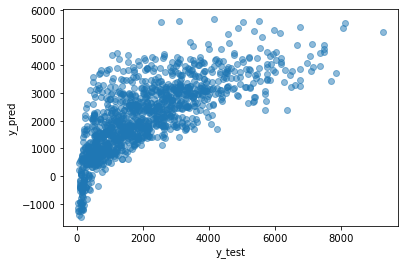

In [73]:
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

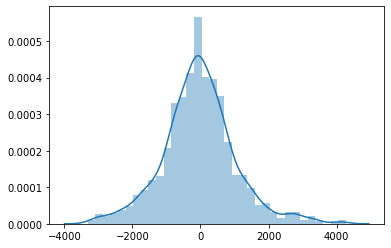

In [74]:
sns.distplot(test_y-y_pred)
plt.show()

### K Fold Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [76]:
folds = StratifiedKFold(n_splits=20)

In [77]:
accuracy_cv = cross_val_score(LinearRegression(),X,y,cv=10)
print(accuracy_cv)

[0.56766541 0.53351933 0.60012726 0.56694354 0.54908101 0.53326962
 0.57433458 0.54358763 0.49363555 0.5992808 ]


In [78]:
accuracy, count = 0,0
for i in accuracy_cv:
    count = count + 1
    accuracy = accuracy + i
print("Accuracy: ",accuracy/count)

Accuracy:  0.5561444736302885


The accuracy of the model is 55.61%. 

## Model Fit after selecting important features

Deleting 2 outlet columns which had high correlations with supermarket type 2 and type 3.

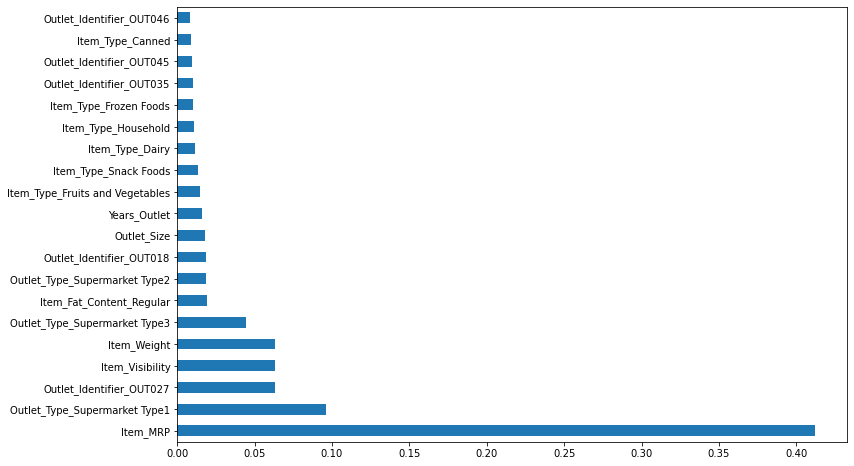

In [79]:
# Mapping the values of feature_importance to represent in bar graph. 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [80]:
data1 = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
        'Item_Outlet_Sales', 'Years_Outlet',
       'Item_Fat_Content_Regular', 'Outlet_Type_Supermarket Type1',
              'Outlet_Type_Supermarket Type3']]

data1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Years_Outlet,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
0,9,0,250,1,"3,735",22,0,1,0
1,6,0,48,1,443,12,1,0,0
2,18,0,142,1,"2,097",22,0,1,0
3,19,0,182,0,732,23,1,0,0
4,9,0,54,2,995,34,0,1,0


In [81]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
train1, test1 = train_test_split(data1, test_size = test_size, random_state = seed)

In [82]:
train1.shape , test1.shape , data1.shape

((3603, 9), (1202, 9), (4805, 9))

In [83]:
# Entire dataset
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
         'Years_Outlet','Item_Fat_Content_Regular', 'Outlet_Type_Supermarket Type1',
              'Outlet_Type_Supermarket Type3']]

y = data[['Item_Outlet_Sales']]

# Training dataset
train1_X = train1[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
         'Years_Outlet','Item_Fat_Content_Regular', 'Outlet_Type_Supermarket Type1',
              'Outlet_Type_Supermarket Type3']]

train1_y = train1[['Item_Outlet_Sales']]

# Testing dataset
test1_X = test1[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
         'Years_Outlet','Item_Fat_Content_Regular', 'Outlet_Type_Supermarket Type1',
              'Outlet_Type_Supermarket Type3']]

test1_y = test1[['Item_Outlet_Sales']]

## Model Fitting

In [84]:
#Model training
model1 = LinearRegression()
result = model1.fit(train1_X, train1_y)

In [85]:
train1_MSE = np.mean((train1_y - result.predict(train1_X))**2)
print("RMSE =",np.sqrt(train1_MSE))

RMSE = Item_Outlet_Sales   1,149
dtype: float64


In [86]:
print("R2 value =",result.score(train1_X, train1_y))

R2 value = 0.555821610022531


### K Fold Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [88]:
folds = StratifiedKFold(n_splits=20)

In [89]:
accuracy_cv = cross_val_score(LinearRegression(),X,y,cv=10)
print(accuracy_cv)

[0.55394582 0.5309343  0.59942423 0.56600519 0.5375158  0.51557134
 0.564618   0.53539771 0.47334908 0.5935934 ]


In [90]:
accuracy, count = 0,0
for i in accuracy_cv:
    count = count + 1
    accuracy = accuracy + i
print("Accuracy: ",accuracy/count)

Accuracy:  0.5470354859717366


The accuracy of the model is 54.70%.
We can make better predictions for this dataset by using KNN Model. 

#### I hearby confirm that the work done in assignment is original and result of my own work. 

# END